# Notebook repaso segundo parcial

El presente notebook tiene como propósito realizar un repaso de los temas vistos en la asignatura Procesamiento y análsis de datos para ciencias sociales en R. Se eligió un noteook en lugar de un script en Rstudio debido a que esta herramienta permite visualizar los resultados celda a celda a fin de observar progresivamente la ejecución del código. Asimismo, esta forma de mostrar los resultados puede resultar más pedagógica que el script en Rstudio.

Antes de iniciar con los temas que se abordarán en este bloque del curso, se procede a cargar las librerías necesarias para el desarrollo de los módulos. Para este propósito, se utiliza la función p_load() de la librería pacman. Esta función verifica si las librerías están o no descargadas, en caso de estarlo, procede a cargarlas o, en caso de que no se encuentren descargadas, las descargar y las carga.

In [48]:
install.packages("pacman")

library(pacman)

pacman::p_load(arrow, openxlsx, readr, tidyr, dplyr, janitor, stringr, stringi)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Introducción a tidyr

La librería **tidyr** tiene como propósito llevar nuestras tablas al formato tidy data. Este último es la filosofía del entorno Tidyverse de cómo se deberían estructurar las bases de datos en formato tabular. Una vez llevamos nuestros recursos al formato tidy data hemos terminado con el procesamiento de los datos y estaríamos listos para la implementación de análisis y la ejecución de modelos cuantitativos.

La filosofía del tidy data se puede resumir en las siguientes tres premisas:


1.   Cada variables es una columna; cada columna es una variable.
2.   Cada observación es una fila; cada fila es una observación.
3.   Cada valor es una celda; cada celda es un valor singular.

En ese sentido, las funciones de la librería tidyr están orientadas a trasformar columnas, filas y valores de tal forma que podamos implementar las premisas del tidy data.

## Pivotear tablas

El pivoteo de tablas consiste en reordenar la estructura de un conjunto de datos sin alterar su estructura relacional. En este procedimiento los valores de una columna pueden pasar a convertirse en columnas en sí mismos (pivotear a lo acho) o, en sentido contrario, un conjunto de columnas pueden convertirse en valores de una única columna (pivotear a lo largo).

En concreto, a continuación se presentan las funciones pivot_longer() y pivot_wider() con objeto de exponer de manera general dos maneras sencillar de pivotear una tabla.

### 1. Pivotear a lo largo

La función pivot_longer() tiene como propósito tranformar convertir un conjunto n de columnas en valores de una única fila.

A continuación, se presenta un ejemplo tomado de la hoja de trucos de tidyr para dar cuenta de esta funcionalidad. En el ejemplo, se tienen observaciones de países y distintos valores por año. En la tabla inicial, cada año corresponde a una única columna.

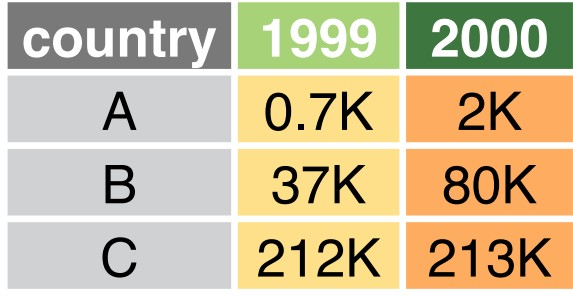

El objetivo, por consiguiente, es transformar las columnas de 1999 y 2000 en valores de una nueva columna la cual daría cuenta del año de cada observación. Asimismo, los valores contenidos en las columnas del año, también pasan a convertirse en los valores de una nueva columna la cual indicaría el atributo al que se estpa refiriendo.

La sintaxis es la siguiente:

pivot_longer(datos_tabla, columas_a_pivotear, names_to = "nombre_nueva_columna_que_colapsa_las_columnas_anteriores", values_to = "nombre_nueva_columna_valores", values_drop_na = FALSE)

En el caso del ejemplo con el que se está trabajando, quedaría de la siguiente forma:

pivot_longer(table_countries_years_cases, cols = c("1999", "2000"), names_to = "year", values_to = "cases")

Lo anterior, daría como resultado la siguiente tabla pivoteada a lo largo:

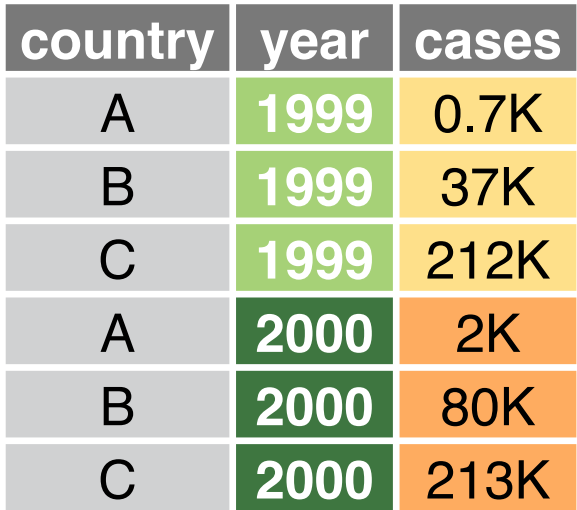

### 2. Pivotear a lo ancho

La función pivot_wider(), por su parte, busca transformar los valores de una columna en columnas en sí mismas. Corresponde al proceso inverso de pivot_longer().

Por consiguiente, dada la siguiente tabla:





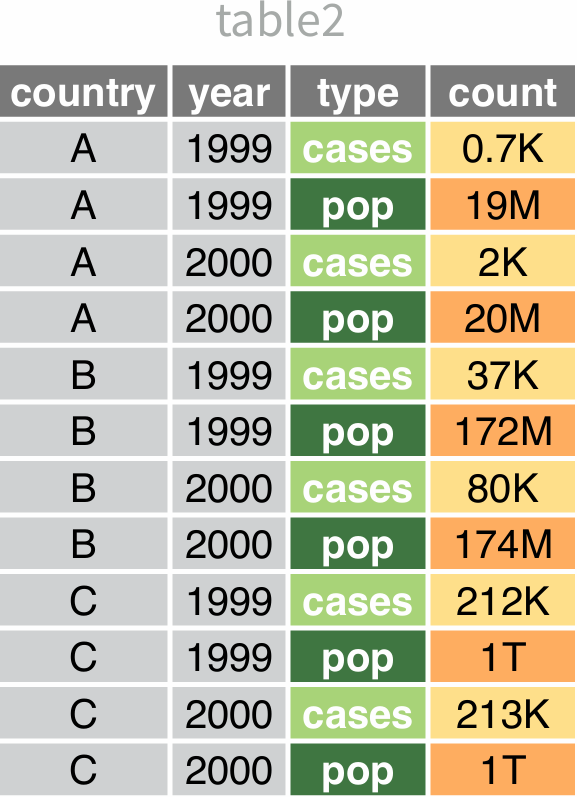

Se busca realizar un pivoteo de la variable "type" a fin de que sus valores se conviertan en nuevas columnas.

La sintaxis es la siguiente:

pivot_wider(datos_tabla, names_from = "columnas_a_pivotear", values_from = "valores_que_recibe_la_nueva_columna")

Por consiguiente, al correr el código pivot_wider(table2, names_from = type, values_from = count) se obtiene el siguiente resultado:



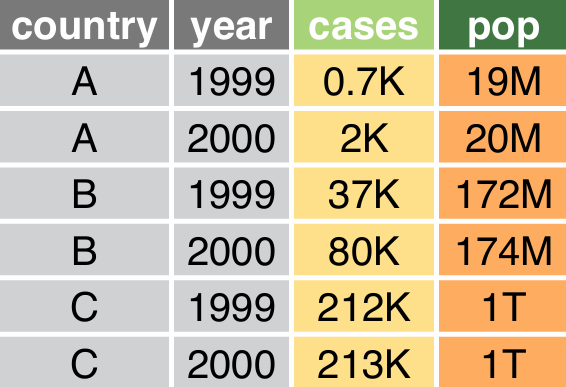

## Taller pivot

Objetivo: Apropiarse del concepto de formato Tidy para conjuntos de datos aplicando las funciones Pivot_longer, pivot_wider y separate_cells.

1. Transformar los años (2018–2021) que están como nombres de columnas en una  sola columna año, y los valores en otra columna percepcion_corrupcion, para el siguiente conjunto de datos.


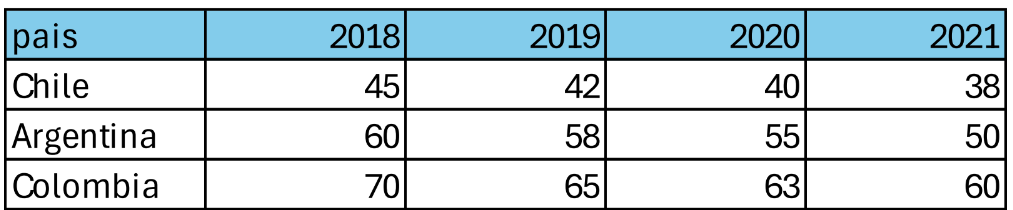

### Solución:

In [49]:
## crear tabla
table1 <- data.frame(
  pais = c("Chile", "Argentina", "Colombia"),
  "2018" = c(45L, 60L, 70L),
  "2019" = c(42L, 58L, 65L),
  "2020" = c(40L, 55L, 63L),
  "2021" = c(38L, 50L, 60L)
)

table1

pais,X2018,X2019,X2020,X2021
<chr>,<int>,<int>,<int>,<int>
Chile,45,42,40,38
Argentina,60,58,55,50
Colombia,70,65,63,60


In [50]:
## realizar el pivoteo a lo largo
table1 <- table1 %>%
  pivot_longer(c("X2018", "X2019", "X2020", "X2021"), names_to = "anio", values_to = "percepcion_corrupcion")

table1

pais,anio,percepcion_corrupcion
<chr>,<chr>,<int>
Chile,X2018,45
Chile,X2019,42
Chile,X2020,40
Chile,X2021,38
Argentina,X2018,60
Argentina,X2019,58
Argentina,X2020,55
Argentina,X2021,50
Colombia,X2018,70


In [51]:
## limpiar la columna de anio para que quede en valores enteros
table1 <- table1 %>%
  mutate(anio = str_remove(anio, "X")) %>%
  mutate(anio = as.integer(anio))

table1

pais,anio,percepcion_corrupcion
<chr>,<int>,<int>
Chile,2018,45
Chile,2019,42
Chile,2020,40
Chile,2021,38
Argentina,2018,60
Argentina,2019,58
Argentina,2020,55
Argentina,2021,50
Colombia,2018,70


2. Transformar el siguiente conjunto de datos mostrando las categorías de la columna variable en columnas diferentes con su respectivo valor.

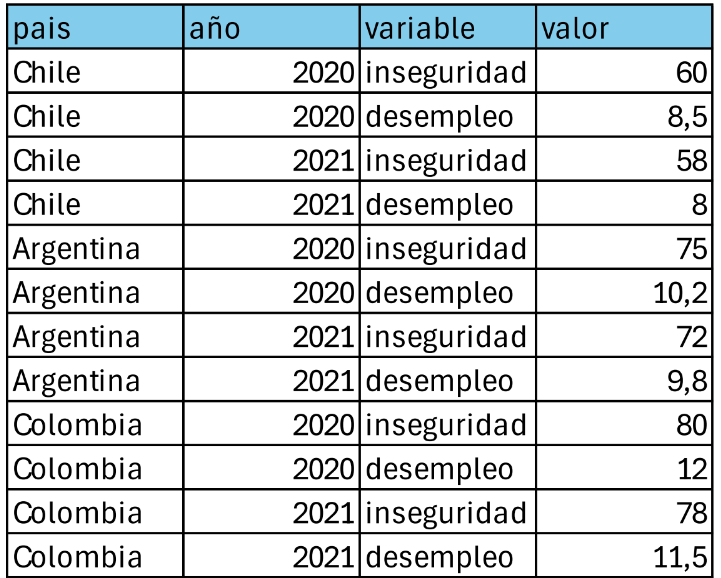

### Solución:

In [52]:
## crear tabla
table2 <- data.frame(
  pais = c("Chile", "Chile", "Chile", "Chile", "Argentina", "Argentina",
  "Argentina", "Argentina", "Colombia", "Colombia", "Colombia", "Colombia"),
  anio = c(2020, 2020, 2021, 2021, 2020, 2020, 2021, 2021, 2020, 2020, 2021, 2021),
  variable = c("inseguridad", "desempleo", "inseguridad", "desempleo",
  "inseguridad", "desempleo", "inseguridad", "desempleo",
  "inseguridad", "desempleo", "inseguridad", "desempleo"),
  valor = c(60, 8.5, 58, 8, 75, 10.2, 72, 9.8, 80, 12, 78, 11.5)
)

table2

pais,anio,variable,valor
<chr>,<dbl>,<chr>,<dbl>
Chile,2020,inseguridad,60.0
Chile,2020,desempleo,8.5
Chile,2021,inseguridad,58.0
Chile,2021,desempleo,8.0
Argentina,2020,inseguridad,75.0
Argentina,2020,desempleo,10.2
Argentina,2021,inseguridad,72.0
Argentina,2021,desempleo,9.8
Colombia,2020,inseguridad,80.0


In [53]:
## pivotear a lo ancho
table2 <- pivot_wider(table2, names_from = "variable", values_from = "valor")

table2

pais,anio,inseguridad,desempleo
<chr>,<dbl>,<dbl>,<dbl>
Chile,2020,60,8.5
Chile,2021,58,8.0
Argentina,2020,75,10.2
Argentina,2021,72,9.8
Colombia,2020,80,12.0
Colombia,2021,78,11.5


3. Utiliza la función separate_wild_delim para separar la columna inseguridad_desempleo en dos columnas para el siguiente conjunto de datos.

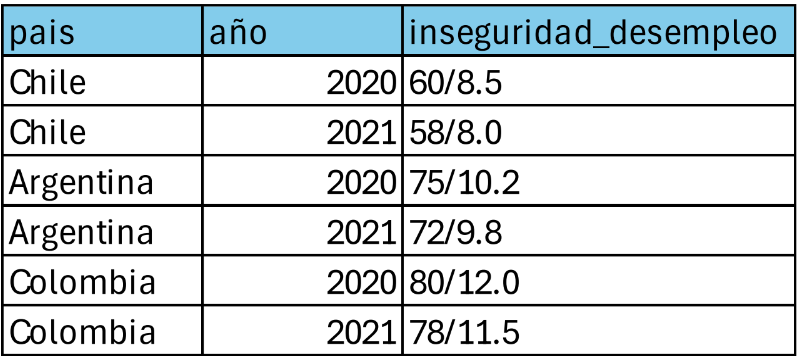

### Solución:

In [54]:
## crear tabla
table3 <- data.frame(
  pais = c("Chile", "Chile", "Argentina", "Argentina", "Colombia", "Colombia"),
  anio = c(2020L, 2021L, 2020L, 2021L, 2020L, 2021L),
  inseguridad_desempleo = c("60/8.5", "58/8.0", "75/10.2", "72/9.8", "80/12.0", "78/11.5")
)

table3

pais,anio,inseguridad_desempleo
<chr>,<int>,<chr>
Chile,2020,60/8.5
Chile,2021,58/8.0
Argentina,2020,75/10.2
Argentina,2021,72/9.8
Colombia,2020,80/12.0
Colombia,2021,78/11.5


In [55]:
## separar valores
table3 <- table3 %>%
  separate(inseguridad_desempleo, sep = "/", into = c("inseguridad", "desempleo")) %>%
  mutate(inseguridad = as.integer(inseguridad)) %>%
  mutate(desempleo = as.numeric(desempleo))

table3

pais,anio,inseguridad,desempleo
<chr>,<int>,<int>,<dbl>
Chile,2020,60,8.5
Chile,2021,58,8.0
Argentina,2020,75,10.2
Argentina,2021,72,9.8
Colombia,2020,80,12.0
Colombia,2021,78,11.5


## Limpieza de datos

En esta sección se hará referencia al proceso de limpiar la información. Ello hace referencia a la eliminación de valores inválidos o incorrectos, la eliminación de caracteres especiales (en caso de que sea necesario) y la homologación y estandarización de la información.

Se suele afirmar que los analistas de datos suelen destinar cerca del 80% del tiempo a los procesos de limpieza de la información. Por consiguiente, es importante tener claros los fundamentos que nos permiten realizar esta tarea de manera eficiente y sin cometer errores que alteren los fenómenos documentados.

Esta parte se abordará de manera muy general de la mano de las librerías stringr y stringi. Se recomienda bastante leer la documentación de ambos paquetes.

### Limpieza nombres columnas

Uno de componentes más relevantes del proceso de limpieza de datos y al que no se le suele prestar la debida atención, es la limpieza de los nombres de las columnas. Si bien el tener nombres estandarizados, con los debidos separadores y en minúsculas nos permite reducir la cantidad de errores al momento de llamar variables, el mayor impacto de la limpieza de variables se encuentra en la eficiencia para escribir código. El no tener que intercalar en mayúsculas y minúsculas, el no usar distintos cacteres especiales como ".", "-", "/" etc., facilita la escritura de código y el autocompletado.

A continuación, se realizará una limpieza general a la tabla de líderes sociales del Observatorio de Tierras. Esta tabla nos permitirá implementar en código varios conceptos y funciones sobre la limpieza de datos.

In [56]:
## cargar tabla
path_t <- "input_data/Base-de-datos-líderes-asesinados_2021.xlsx"

tl <- read.xlsx(path_t)

head(tl)

colnames(tl)

,ID,NOMBRE,GENERO,CEDULA,TIPO.LIDER,VINCULACION.PROCESO.COCA/SUSTITUCION,NIVEL.ORGANIZACION,TIPO.1.ORGANIZACION,TIPO.2.ORGANIZACION,TIPO.3.ORGANIZACION,⋯,FUENTE.1,FUENTE.2,FUENTE.3,FUENTE.4,LISTADO,FECHA.CONSULTA,DATOS.REVELANTES.FUENTE,CASO.GRIS,CASO.GRIS.COD,OBSERVACIONES
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,ALVARO FERNANDO QUEGUAN,1,M,1,2,3,6,1,9,⋯,http://prensarural.org/spip/spip.php?article10745,http://www.marchapatriotica.org/index.php?option=com_content&view=article&id=975%3Anarino-l-asesinado-lider-campesino&catid=107&Itemid=482,http://pagina10.com/index.php/pacifico/item/1081-en-tumaco-de-13-capturados-s%C3%B3lo-uno-qued%C3%B3-detenido#.U4_Wa_l5NZ5,http://prensarural.org/spip/spip.php?article10893,Marcha Patriotica,41796,"En enfrentamiento entre el ejercito y las FARC, cayo herido el senor alvaro Queguan producto del fuego cruzado. Posteriormente, el grupo de militares procedio a detener arbitrariamente y trasladar hasta el centro poblado del Municipio de Tumaco a catorce campesionos de la zona.",NO,NO,"Junto con el homicidio de Queguan, se efectuo la captura masiva de 13 campesinos de la zona acusados de rebelion y presentados como guerrilleros. http://www.semana.com/especiales/defensores-derechos-asesinados/Nariño.html"
2,2,EMEL ANTONIO VARELA TUBERQUIA,1,71942866,1,2,3,6,1,M,⋯,http://prensarural.org/spip/spip.php?article11520,http://www.eluniversal.com.co/monteria-y-sincelejo/sucesos/asesinan-lider-del-alto-sinu-en-cordoba-128804,http://elmeridianodecordoba.com.co/index.php?option=com_k2&view=item&id=38321:asesinan-a-otro-l%C3%ADder&Itemid=120,http://elheraldo.co/region/cordoba/asesinado-otro-lider-civico-en-tierralta-cordoba-119225,Defensoria,41796,"Cedula de ciudadania nro. 71.942.866. En la tarde de ayer, siendo aproximadamente las seis pm hombres armados ultimaron de varios impactos de bala la integridad de EMEL ANTONIO VARELA TUBERQUIA quien se desempenaba como Presidente de la Junta de Accion Comunal de la vereda La Estrella perteneciente al corregimiento de Zaiza y quien tambien hacia parte de la Asociacion Campesina para el Desarrollo del Alto Sinu ASODECAS.",NO,NO,Cartilla heroes anonimos. Esta en la ultima matriz de la Defensoria. En algunos medios lo escriben como: (Emer)
3,2,IVAN DARIO RESTREPO,1,M,2,2,4,8,7,M,⋯,http://forjandofuturos.org/fundacion/index.php?option=com_content&view=article&id=1106:ivan-dario-restrepo-lider-reclamante-de-tierras-asesinado-en-bello&catid=67&Itemid=163,http://www.elespectador.com/noticias/nacional/asesinan-lider-campesino-reclamante-de-tierras-antioqui-articulo-420230 http://www.desdeabajo.info/component/k2/item/22014-la-onu-alerta-sobre-los-asesinatos-de-l%C3%ADderes-campesinos-en-colombia.html,http://www.verdadabierta.com/component/content/article/42-asesinatos-selectivos/4575-despojo-urbano-causa-victima-en-bello-antioquia/,http://issuu.com/gulcuec/docs/informe_enero_junio_2013_somos_defe/18,NA,41796,"F4: Restrepo venia demostrando las alianzas entre la banda criminal ""Los Triana"" y agentes de la Policia Nacional. El 19 de junio de 2012, sus escoltas enviaron un informe a la Unidad Nacional de Victimas, solicitando el fortalecimiento de su proteccion. Sin embargo, no fue atendida.",NO,NO,Estaba con esquema de proteccion y los que le dispararon estaban vestidos de policia
4,3,CESAR GARCIA,1,M,1,2,4,6,3,3,⋯,http://noticiasunolaredindependiente.com/2013/11/03/noticias/asesinado-el-opositor-del-proyecto-de-mineria-la-colosa-en-tolima/,http://prensarural.org/spip/spip.php?article12517,http://www.elespectador.com/noticias/nacional/el-loco-se-le-opuso-colosa-articulo-457492,http://www.semanariovoz.com/2013/11/13/crimenes-contra-lideres-campesinos-diez-asesinados-en-dos-meses/,NA,41796,"F2. CESAR GARCÍA, el día de hoy (2 de noviembre de 2013) entre las 5 y 6 de la tarde fue asesinado con un tiro en la cabeza cuando llegaba a su finca ubicada la vereda la Cajón la Leona del municipio d

[1] "ID"                                  
 [2] "NOMBRE"                              
 [3] "GENERO"                              
 [4] "CEDULA"                              
 [5] "TIPO.LIDER"                          
 [6] "VINCULACION.PROCESO.COCA/SUSTITUCION"
 [7] "NIVEL.ORGANIZACION"                  
 [8] "TIPO.1.ORGANIZACION"                 
 [9] "TIPO.2.ORGANIZACION"                 
[10] "TIPO.3.ORGANIZACION"                 
[11] "VICTIMIZACION"                       
[12] "FECHA.DESAPARICION"                  
[13] "DIA"                                 
[14] "MES"                                 
[15] "AÑO"                                 
[16] "Trimestre"                           
[17] "VEREDA"                              
[18] "CORREGIMIENTO"                       
[19] "MUNICIPIO"                           
[20] "CODIGO.MUN"                          
[21] "DEPARTAMENTO"                        
[22] "CODIGO.DEP"                          
[23] "Presunto.autor"                      
[24] "NOMBRE.PRESUNTO.AUTOR"               
[25] "CATEGORIA.MODUS"                     
[26] "CATEGORIA.MODUS.DOS"                 
[27] "TIPO.DE.ARMA"                        
[28] "TORTURA"                             
[29] "AMENAZAS"                            
[30] "PROTECCION"                          
[31] "FALSO.POSITIVO"                      
[32] "PERFIL"                              
[33] "NOMBRE.TIPO.ORGANIZACION.1"          
[34] "NOMBRE.TIPO.ORGANIZACION.2"          
[35] "NOMBRE.TIPO.ORGANIZACION.3"          
[36] "Motivo"                              
[37] "MODUS.OPERANDI"                      
[38] "FUENTE.1"                            
[39] "FUENTE.2"                            
[40] "FUENTE.3"                            
[41] "FUENTE.4"                            
[42] "LISTADO"                             
[43] "FECHA.CONSULTA"                      
[44] "DATOS.REVELANTES.FUENTE"             
[45] "CASO.GRIS"                           
[46] "CASO.GRIS.COD"                       
[47] "OBSERVACIONES"

Es importante observar los nombres de las variables que se cargan por defecto a R. Se observan mezclas entre mayúsculas y minúsculas, caractéres especiales, espacios entre palabras etc.

In [57]:
## limpiar nombres columnas
tl <- tl %>%
  clean_names()

head(tl)

colnames(tl)

,id,nombre,genero,cedula,tipo_lider,vinculacion_proceso_coca_sustitucion,nivel_organizacion,tipo_1_organizacion,tipo_2_organizacion,tipo_3_organizacion,⋯,fuente_1,fuente_2,fuente_3,fuente_4,listado,fecha_consulta,datos_revelantes_fuente,caso_gris,caso_gris_cod,observaciones
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,ALVARO FERNANDO QUEGUAN,1,M,1,2,3,6,1,9,⋯,http://prensarural.org/spip/spip.php?article10745,http://www.marchapatriotica.org/index.php?option=com_content&view=article&id=975%3Anarino-l-asesinado-lider-campesino&catid=107&Itemid=482,http://pagina10.com/index.php/pacifico/item/1081-en-tumaco-de-13-capturados-s%C3%B3lo-uno-qued%C3%B3-detenido#.U4_Wa_l5NZ5,http://prensarural.org/spip/spip.php?article10893,Marcha Patriotica,41796,"En enfrentamiento entre el ejercito y las FARC, cayo herido el senor alvaro Queguan producto del fuego cruzado. Posteriormente, el grupo de militares procedio a detener arbitrariamente y trasladar hasta el centro poblado del Municipio de Tumaco a catorce campesionos de la zona.",NO,NO,"Junto con el homicidio de Queguan, se efectuo la captura masiva de 13 campesinos de la zona acusados de rebelion y presentados como guerrilleros. http://www.semana.com/especiales/defensores-derechos-asesinados/Nariño.html"
2,2,EMEL ANTONIO VARELA TUBERQUIA,1,71942866,1,2,3,6,1,M,⋯,http://prensarural.org/spip/spip.php?article11520,http://www.eluniversal.com.co/monteria-y-sincelejo/sucesos/asesinan-lider-del-alto-sinu-en-cordoba-128804,http://elmeridianodecordoba.com.co/index.php?option=com_k2&view=item&id=38321:asesinan-a-otro-l%C3%ADder&Itemid=120,http://elheraldo.co/region/cordoba/asesinado-otro-lider-civico-en-tierralta-cordoba-119225,Defensoria,41796,"Cedula de ciudadania nro. 71.942.866. En la tarde de ayer, siendo aproximadamente las seis pm hombres armados ultimaron de varios impactos de bala la integridad de EMEL ANTONIO VARELA TUBERQUIA quien se desempenaba como Presidente de la Junta de Accion Comunal de la vereda La Estrella perteneciente al corregimiento de Zaiza y quien tambien hacia parte de la Asociacion Campesina para el Desarrollo del Alto Sinu ASODECAS.",NO,NO,Cartilla heroes anonimos. Esta en la ultima matriz de la Defensoria. En algunos medios lo escriben como: (Emer)
3,2,IVAN DARIO RESTREPO,1,M,2,2,4,8,7,M,⋯,http://forjandofuturos.org/fundacion/index.php?option=com_content&view=article&id=1106:ivan-dario-restrepo-lider-reclamante-de-tierras-asesinado-en-bello&catid=67&Itemid=163,http://www.elespectador.com/noticias/nacional/asesinan-lider-campesino-reclamante-de-tierras-antioqui-articulo-420230 http://www.desdeabajo.info/component/k2/item/22014-la-onu-alerta-sobre-los-asesinatos-de-l%C3%ADderes-campesinos-en-colombia.html,http://www.verdadabierta.com/component/content/article/42-asesinatos-selectivos/4575-despojo-urbano-causa-victima-en-bello-antioquia/,http://issuu.com/gulcuec/docs/informe_enero_junio_2013_somos_defe/18,NA,41796,"F4: Restrepo venia demostrando las alianzas entre la banda criminal ""Los Triana"" y agentes de la Policia Nacional. El 19 de junio de 2012, sus escoltas enviaron un informe a la Unidad Nacional de Victimas, solicitando el fortalecimiento de su proteccion. Sin embargo, no fue atendida.",NO,NO,Estaba con esquema de proteccion y los que le dispararon estaban vestidos de policia
4,3,CESAR GARCIA,1,M,1,2,4,6,3,3,⋯,http://noticiasunolaredindependiente.com/2013/11/03/noticias/asesinado-el-opositor-del-proyecto-de-mineria-la-colosa-en-tolima/,http://prensarural.org/spip/spip.php?article12517,http://www.elespectador.com/noticias/nacional/el-loco-se-le-opuso-colosa-articulo-457492,http://www.semanariovoz.com/2013/11/13/crimenes-contra-lideres-campesinos-diez-asesinados-en-dos-meses/,NA,41796,"F2. CESAR GARCÍA, el día de hoy (2 de noviembre de 2013) entre las 5 y 6 de la tarde fue asesinado con un tiro en la cabeza cuando llegaba a su finca ubicada la vereda la Cajón la Leona del municipio d

[1] "id"                                  
 [2] "nombre"                              
 [3] "genero"                              
 [4] "cedula"                              
 [5] "tipo_lider"                          
 [6] "vinculacion_proceso_coca_sustitucion"
 [7] "nivel_organizacion"                  
 [8] "tipo_1_organizacion"                 
 [9] "tipo_2_organizacion"                 
[10] "tipo_3_organizacion"                 
[11] "victimizacion"                       
[12] "fecha_desaparicion"                  
[13] "dia"                                 
[14] "mes"                                 
[15] "ano"                                 
[16] "trimestre"                           
[17] "vereda"                              
[18] "corregimiento"                       
[19] "municipio"                           
[20] "codigo_mun"                          
[21] "departamento"                        
[22] "codigo_dep"                          
[23] "presunto_autor"                      
[24] "nombre_presunto_autor"               
[25] "categoria_modus"                     
[26] "categoria_modus_dos"                 
[27] "tipo_de_arma"                        
[28] "tortura"                             
[29] "amenazas"                            
[30] "proteccion"                          
[31] "falso_positivo"                      
[32] "perfil"                              
[33] "nombre_tipo_organizacion_1"          
[34] "nombre_tipo_organizacion_2"          
[35] "nombre_tipo_organizacion_3"          
[36] "motivo"                              
[37] "modus_operandi"                      
[38] "fuente_1"                            
[39] "fuente_2"                            
[40] "fuente_3"                            
[41] "fuente_4"                            
[42] "listado"                             
[43] "fecha_consulta"                      
[44] "datos_revelantes_fuente"             
[45] "caso_gris"                           
[46] "caso_gris_cod"                       
[47] "observaciones"

Luego de aplicar la función clean_names() del paquete janitor, se observa una tabla donde los nombres de las columnas se encuentran estandarizados, no contienen múltiples caractéres especiales y siguen un formato que incorpora buenas prácticas para el manejo de información en formato tabular.

El siguiente paso es la estandarización del texto. Para ello, se realiza un proceso de transliteración el cual elimina símbolos especiales como lo son tíldes, diéresis etc. Este proceso se implementa a partir de la función stri_trans_general() con el parámetro "latin-ascci", así:

In [58]:
# transliteración de la columna "perfil"
tl <- tl %>%
  mutate(perfil = stri_trans_general(perfil, "latin-ascii"))

head(tl %>% select(perfil))

,perfil
,<chr>
1,"ALVARO QUEGUAN, era un destacado dirigente campesino vicepresidente de la Junta de Accion Comunal de la vereda de Mugui, integrante de la asamblea de delegados de la Asociacion de Juntas Comunitarias de los Rios Mira, Nulpe y Mataje - ASOMINUMA, integrante de la Coordinacion Departamental Narino del Proceso de Unidad Popular del Suroccidente Colombiano - PUPSOC y del Movimiento Politico y Social Marcha Patriotica."
2,Presidente de la Junta de Accion Comunal de la vereda La Estrella perteneciente al corregimiento de Zaiza y quien tambien hacia parte de la Asociacion Campesina para el Desarrollo del Alto Sinu ASODECAS.
3,"Lider reclamante de tierras. Mesa de participacion de victimas, trabajo con victimas del despojo de propiedades urbanas"
4,"Principal opositor del proyecto minero La Colosa. Presidente de la Junta de Accion Comunal de la Vereda Cajon La Leona, integrante del Comite Ambiental y Campesino de Cajamarca y de la Red de Comites Ambientales y Campesinos del Tolima."
5,"Presidente de la junta de accion comunal de la vereda El Bojoso servia como enlace de la Asociacion Campesina del Catatumbo -ASCAMCAT y las familias de ese lugar para la ejecucion de proyectos de reparacion a las victimas de la erradicacion violenta de cultivos, acordados entre la Asociacion Campesina y el gobierno nacional en el marco de las negociaciones de la Mesa de Interlocucion y Acuerdo - MIA."
6,"Vicepresidente de la Junta de Accion Comunal de la Vereda Alto Limon , del Municipio de San Pablo, sur de Bolivar, en la Zona de Reserva Campesina del Valle del Rio Cimitarra."


Se observa que, aún persisten diferencias entre los caractéres del texto, dado que se tienen letras en mayúsculas y minúsculas. El paso siguiente es, por tanto, pasar todo el texto a letras mayúsculas. Se recomeinda que sean mayúsculas para lograr diferencias facilmente de las referencias a los nombres de variables (minúsculas) de los valores de esas variables (mayúsculas).

Para este propósito se hace uso de la función str_to_upper() de la librería stringr.

In [59]:
## cambiar todas las columnas de tipo character a mayúsculas
tl <- tl %>%
  mutate_if(is.character, ~str_to_upper(.))

head(tl %>% select(perfil))

,perfil
,<chr>
1,"ALVARO QUEGUAN, ERA UN DESTACADO DIRIGENTE CAMPESINO VICEPRESIDENTE DE LA JUNTA DE ACCION COMUNAL DE LA VEREDA DE MUGUI, INTEGRANTE DE LA ASAMBLEA DE DELEGADOS DE LA ASOCIACION DE JUNTAS COMUNITARIAS DE LOS RIOS MIRA, NULPE Y MATAJE - ASOMINUMA, INTEGRANTE DE LA COORDINACION DEPARTAMENTAL NARINO DEL PROCESO DE UNIDAD POPULAR DEL SUROCCIDENTE COLOMBIANO - PUPSOC Y DEL MOVIMIENTO POLITICO Y SOCIAL MARCHA PATRIOTICA."
2,PRESIDENTE DE LA JUNTA DE ACCION COMUNAL DE LA VEREDA LA ESTRELLA PERTENECIENTE AL CORREGIMIENTO DE ZAIZA Y QUIEN TAMBIEN HACIA PARTE DE LA ASOCIACION CAMPESINA PARA EL DESARROLLO DEL ALTO SINU ASODECAS.
3,"LIDER RECLAMANTE DE TIERRAS. MESA DE PARTICIPACION DE VICTIMAS, TRABAJO CON VICTIMAS DEL DESPOJO DE PROPIEDADES URBANAS"
4,"PRINCIPAL OPOSITOR DEL PROYECTO MINERO LA COLOSA. PRESIDENTE DE LA JUNTA DE ACCION COMUNAL DE LA VEREDA CAJON LA LEONA, INTEGRANTE DEL COMITE AMBIENTAL Y CAMPESINO DE CAJAMARCA Y DE LA RED DE COMITES AMBIENTALES Y CAMPESINOS DEL TOLIMA."
5,"PRESIDENTE DE LA JUNTA DE ACCION COMUNAL DE LA VEREDA EL BOJOSO SERVIA COMO ENLACE DE LA ASOCIACION CAMPESINA DEL CATATUMBO -ASCAMCAT Y LAS FAMILIAS DE ESE LUGAR PARA LA EJECUCION DE PROYECTOS DE REPARACION A LAS VICTIMAS DE LA ERRADICACION VIOLENTA DE CULTIVOS, ACORDADOS ENTRE LA ASOCIACION CAMPESINA Y EL GOBIERNO NACIONAL EN EL MARCO DE LAS NEGOCIACIONES DE LA MESA DE INTERLOCUCION Y ACUERDO - MIA."
6,"VICEPRESIDENTE DE LA JUNTA DE ACCION COMUNAL DE LA VEREDA ALTO LIMON , DEL MUNICIPIO DE SAN PABLO, SUR DE BOLIVAR, EN LA ZONA DE RESERVA CAMPESINA DEL VALLE DEL RIO CIMITARRA."


Por último, para fase de la limpieza se procede con la eliminaciónde de espacios vacíos o innecesarios. Ello implica eliminar espacios al principio y al final de cada cadena de texto y eliminar los espacios dobles. Para este propósito, se hará uso de la función str_squish() de la librería stringr.

In [60]:
tl <- tl %>%
  mutate_if(is.character, ~str_squish(.))

head(tl)

,id,nombre,genero,cedula,tipo_lider,vinculacion_proceso_coca_sustitucion,nivel_organizacion,tipo_1_organizacion,tipo_2_organizacion,tipo_3_organizacion,⋯,fuente_1,fuente_2,fuente_3,fuente_4,listado,fecha_consulta,datos_revelantes_fuente,caso_gris,caso_gris_cod,observaciones
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,ALVARO FERNANDO QUEGUAN,1,M,1,2,3,6,1,9,⋯,HTTP://PRENSARURAL.ORG/SPIP/SPIP.PHP?ARTICLE10745,HTTP://WWW.MARCHAPATRIOTICA.ORG/INDEX.PHP?OPTION=COM_CONTENT&VIEW=ARTICLE&ID=975%3ANARINO-L-ASESINADO-LIDER-CAMPESINO&CATID=107&ITEMID=482,HTTP://PAGINA10.COM/INDEX.PHP/PACIFICO/ITEM/1081-EN-TUMACO-DE-13-CAPTURADOS-S%C3%B3LO-UNO-QUED%C3%B3-DETENIDO#.U4_WA_L5NZ5,HTTP://PRENSARURAL.ORG/SPIP/SPIP.PHP?ARTICLE10893,MARCHA PATRIOTICA,41796,"EN ENFRENTAMIENTO ENTRE EL EJERCITO Y LAS FARC, CAYO HERIDO EL SENOR ALVARO QUEGUAN PRODUCTO DEL FUEGO CRUZADO. POSTERIORMENTE, EL GRUPO DE MILITARES PROCEDIO A DETENER ARBITRARIAMENTE Y TRASLADAR HASTA EL CENTRO POBLADO DEL MUNICIPIO DE TUMACO A CATORCE CAMPESIONOS DE LA ZONA.",NO,NO,"JUNTO CON EL HOMICIDIO DE QUEGUAN, SE EFECTUO LA CAPTURA MASIVA DE 13 CAMPESINOS DE LA ZONA ACUSADOS DE REBELION Y PRESENTADOS COMO GUERRILLEROS. HTTP://WWW.SEMANA.COM/ESPECIALES/DEFENSORES-DERECHOS-ASESINADOS/NARIÑO.HTML"
2,2,EMEL ANTONIO VARELA TUBERQUIA,1,71942866,1,2,3,6,1,M,⋯,HTTP://PRENSARURAL.ORG/SPIP/SPIP.PHP?ARTICLE11520,HTTP://WWW.ELUNIVERSAL.COM.CO/MONTERIA-Y-SINCELEJO/SUCESOS/ASESINAN-LIDER-DEL-ALTO-SINU-EN-CORDOBA-128804,HTTP://ELMERIDIANODECORDOBA.COM.CO/INDEX.PHP?OPTION=COM_K2&VIEW=ITEM&ID=38321:ASESINAN-A-OTRO-L%C3%ADDER&ITEMID=120,HTTP://ELHERALDO.CO/REGION/CORDOBA/ASESINADO-OTRO-LIDER-CIVICO-EN-TIERRALTA-CORDOBA-119225,DEFENSORIA,41796,"CEDULA DE CIUDADANIA NRO. 71.942.866. EN LA TARDE DE AYER, SIENDO APROXIMADAMENTE LAS SEIS PM HOMBRES ARMADOS ULTIMARON DE VARIOS IMPACTOS DE BALA LA INTEGRIDAD DE EMEL ANTONIO VARELA TUBERQUIA QUIEN SE DESEMPENABA COMO PRESIDENTE DE LA JUNTA DE ACCION COMUNAL DE LA VEREDA LA ESTRELLA PERTENECIENTE AL CORREGIMIENTO DE ZAIZA Y QUIEN TAMBIEN HACIA PARTE DE LA ASOCIACION CAMPESINA PARA EL DESARROLLO DEL ALTO SINU ASODECAS.",NO,NO,CARTILLA HEROES ANONIMOS. ESTA EN LA ULTIMA MATRIZ DE LA DEFENSORIA. EN ALGUNOS MEDIOS LO ESCRIBEN COMO: (EMER)
3,2,IVAN DARIO RESTREPO,1,M,2,2,4,8,7,M,⋯,HTTP://FORJANDOFUTUROS.ORG/FUNDACION/INDEX.PHP?OPTION=COM_CONTENT&VIEW=ARTICLE&ID=1106:IVAN-DARIO-RESTREPO-LIDER-RECLAMANTE-DE-TIERRAS-ASESINADO-EN-BELLO&CATID=67&ITEMID=163,HTTP://WWW.ELESPECTADOR.COM/NOTICIAS/NACIONAL/ASESINAN-LIDER-CAMPESINO-RECLAMANTE-DE-TIERRAS-ANTIOQUI-ARTICULO-420230 HTTP://WWW.DESDEABAJO.INFO/COMPONENT/K2/ITEM/22014-LA-ONU-ALERTA-SOBRE-LOS-ASESINATOS-DE-L%C3%ADDERES-CAMPESINOS-EN-COLOMBIA.HTML,HTTP://WWW.VERDADABIERTA.COM/COMPONENT/CONTENT/ARTICLE/42-ASESINATOS-SELECTIVOS/4575-DESPOJO-URBANO-CAUSA-VICTIMA-EN-BELLO-ANTIOQUIA/,HTTP://ISSUU.COM/GULCUEC/DOCS/INFORME_ENERO_JUNIO_2013_SOMOS_DEFE/18,NA,41796,"F4: RESTREPO VENIA DEMOSTRANDO LAS ALIANZAS ENTRE LA BANDA CRIMINAL ""LOS TRIANA"" Y AGENTES DE LA POLICIA NACIONAL. EL 19 DE JUNIO DE 2012, SUS ESCOLTAS ENVIARON UN INFORME A LA UNIDAD NACIONAL DE VICTIMAS, SOLICITANDO EL FORTALECIMIENTO DE SU PROTECCION. SIN EMBARGO, NO FUE ATENDIDA.",NO,NO,ESTABA CON ESQUEMA DE PROTECCION Y LOS QUE LE DISPARARON ESTABAN VESTIDOS DE POLICIA
4,3,CESAR GARCIA,1,M,1,2,4,6,3,3,⋯,HTTP://NOTICIASUNOLAREDINDEPENDIENTE.COM/2013/11/03/NOTICIAS/ASESINADO-EL-OPOSITOR-DEL-PROYECTO-DE-MINERIA-LA-COLOSA-EN-TOLIMA/,HTTP://PRENSARURAL.ORG/SPIP/SPIP.PHP?ARTICLE12517,HTTP://WWW.ELESPECTADOR.COM/NOTICIAS/NACIONAL/EL-LOCO-SE-LE-OPUSO-COLOSA-ARTICULO-457492,HTTP://WWW.SEMANARIOVOZ.COM/2013/11/13/CRIMENES-CONTRA-LIDERES-CAMPESINOS-DIEZ-ASESINADOS-EN-DOS-MESES/,NA,41796,"F2. CESAR GARCÍA, EL DÍA DE HOY (2 DE NOVIEMBRE DE 2013) ENTRE LAS 5 Y 6 DE LA TARDE FUE ASESINADO CON UN TIRO EN LA CABEZA CUANDO LLEGABA A SU FINCA UBICADA LA VEREDA LA CAJÓN LA LEONA DEL MUNICIPIO D

Esta limpieza general facilita enormemente el trabajo con cadenas de texto. Por ejemplo, si se deseara filtrar los registros de líderes cuyas reivindicaciones están relacionadas con lo agrario, se prodría aplicar un filtro con la palabra "TIERRA" en la columna de perfil. Así:

In [61]:
## filtro
filt_tl <- tl %>%
  filter(str_detect(perfil, "TIERRA"))

head(filt_tl)

,id,nombre,genero,cedula,tipo_lider,vinculacion_proceso_coca_sustitucion,nivel_organizacion,tipo_1_organizacion,tipo_2_organizacion,tipo_3_organizacion,⋯,fuente_1,fuente_2,fuente_3,fuente_4,listado,fecha_consulta,datos_revelantes_fuente,caso_gris,caso_gris_cod,observaciones
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,IVAN DARIO RESTREPO,1,M,2,2,4,8,7,M,⋯,HTTP://FORJANDOFUTUROS.ORG/FUNDACION/INDEX.PHP?OPTION=COM_CONTENT&VIEW=ARTICLE&ID=1106:IVAN-DARIO-RESTREPO-LIDER-RECLAMANTE-DE-TIERRAS-ASESINADO-EN-BELLO&CATID=67&ITEMID=163,HTTP://WWW.ELESPECTADOR.COM/NOTICIAS/NACIONAL/ASESINAN-LIDER-CAMPESINO-RECLAMANTE-DE-TIERRAS-ANTIOQUI-ARTICULO-420230 HTTP://WWW.DESDEABAJO.INFO/COMPONENT/K2/ITEM/22014-LA-ONU-ALERTA-SOBRE-LOS-ASESINATOS-DE-L%C3%ADDERES-CAMPESINOS-EN-COLOMBIA.HTML,HTTP://WWW.VERDADABIERTA.COM/COMPONENT/CONTENT/ARTICLE/42-ASESINATOS-SELECTIVOS/4575-DESPOJO-URBANO-CAUSA-VICTIMA-EN-BELLO-ANTIOQUIA/,HTTP://ISSUU.COM/GULCUEC/DOCS/INFORME_ENERO_JUNIO_2013_SOMOS_DEFE/18,NA,41796,"F4: RESTREPO VENIA DEMOSTRANDO LAS ALIANZAS ENTRE LA BANDA CRIMINAL ""LOS TRIANA"" Y AGENTES DE LA POLICIA NACIONAL. EL 19 DE JUNIO DE 2012, SUS ESCOLTAS ENVIARON UN INFORME A LA UNIDAD NACIONAL DE VICTIMAS, SOLICITANDO EL FORTALECIMIENTO DE SU PROTECCION. SIN EMBARGO, NO FUE ATENDIDA.",NO,NO,ESTABA CON ESQUEMA DE PROTECCION Y LOS QUE LE DISPARARON ESTABAN VESTIDOS DE POLICIA
2,7,EBERTO GONZALEZ HOYOS,1,M,3,2,4,8,M,M,⋯,HTTP://WWW.COLECTIVODEABOGADOS.ORG/INCREMENTO-DE-DENUNCIAS-DE,HTTP://CONSULTA.LAPATRIA.COM/STORY/LEY-DE-V%C3%ADCTIMAS-GENERA-ESPERANZAS-Y-DUDAS,HTTP://COEUROPA.ORG.CO/SITES/DEFAULT/FILES/BOLETIN%201.PDF,HTTP://WWW.ELTIEMPO.COM/ARCHIVO/DOCUMENTO/MAM-4788466,CCJ,41796,"F2: EBERTO JOSE HACE PARTE DE LA COMUNIDAD DE LA ZONA HUMANITARIA DE CARACOLI, CUENCA DEL CURBARADO, QUE PARTICIPA DEL PROCESO DE RESTITUCION Y DE ENTREGA MATERIAL Y EFECTIVA DE LOS TERRITORIOS COLECTIVOS. HABIA SIDO AMENAZADO VERBALMENTE POR EMPLEADOS DE LOS LLAMADOS TERCEROS OCUPANTES DE LAS TIERRAS QUE LE FUERON ARREBATADAS.",NO,NO,NA
3,8,LEONCIO MANUEL MENDOZA MEJIA,1,M,2,2,4,8,M,M,⋯,HTTP://ELMERIDIANODECORDOBA.COM.CO/LARUTADELDESPOJO/INDEX.PHP/TESTIMONIOS/5-UN-MUERTO-24-DESPOJADOS-Y-800-HECTAREAS-EN-MANOS-DE-TESTAFERROS,HTTP://WWW.ELUNIVERSAL.COM.CO/MONTERIA-Y-SINCELEJO/SUCESOS/ASESINARON-AYER-AL-PADRE-DE-UN-RECLAMANTE-DE-TIERRAS-54985,HTTP://WWW.ELINFORMADOR.COM.CO/INDEX.PHP?OPTION=COM_CONTENT&VIEW=ARTICLE&ID=28727:MATARON-A-ABUELO-DE-76-ANOS&CATID=72:SUCESOS&ITEMID=416,HTTP://WWW.HRW.ORG/ES/NODE/118646/SECTION/7,NA,41796,"UN HOMBRE DE 78 ANOS DE EDAD, IDENTIFICADO COMO LEONCIO MANUEL MENDOZA MEJIA, FUE ASESINADO A LAS SEIS DE LA MAÑANA DE AYER EN EL BARRIO GALILEA DE LA CAPITAL DE CORDOBA. UN HOMBRE ASESINO CON UN ARMA DE FUEGO A MENDOZA FRENTE A SU VIVIENDA EN MONTERIA",NO,NO,NA
4,9,NESTOR GOMEZ COGOLLO,1,M,12,2,4,1,M,M,⋯,HTTP://PRENSARURAL.ORG/SPIP/SPIP.PHP?ARTICLE9444,HTTP://ELMERIDIANODECORDOBA.COM.CO/JUDICIAL/ITEM/14353-MATAN-A-UN-HOMBRE-Y-SU-YERNO,NA,NA,NA,41796,"EL DIA 2 DE OCTUBRE DE 2012 SON RAPTADOS DESDE SUS SITIOS DE TRABAJO POR HOMBRES FUERTEMENTE ARMADOS DE LA BANDA PARAMILITAR AGUILAS NEGRAS, LOS LIDERES COMUNALES NESTOR GOMEZ COGOLLO Y JOSE INES RANGEL SAENZ, DE 60 Y 48 ANOS, RESPECTIVAMENTE, LOS CUALES FUERON ENCONTRADOS VILMENTE ASESINADOS A BALAZOS EL DIA 3 DE OCTUBRE DE 2012. LOS HECHOS OCURRIERON EN LA VEREDA EL VENADO, JURISDICCION DEL CORREGIMIENTO EL DIAMANTE, A 50 KILOMETROS DE TIERRALTA.",NO,NO,NA
5,10,JOSE INES RANGEL SAENZ,1,M,12,2,4,1,M,M,⋯,HTTP://PRENSARURAL.ORG/SPIP/SPIP.PHP?ARTICLE9444,HTTP://ELMERIDIANODECORDOBA.COM.CO/JUDICIAL/ITEM/14353-MATAN-A-UN-HOMBRE-Y-SU-YERNO,NA,NA,NA,41796,"EL DIA 2 DE OCTUBRE DE 2012 SON RAPTADOS DESDE SUS SITIOS DE TRABAJO POR HOMBRES FUERTEMENTE ARMADOS DE LA BANDA PARAMILITAR AGUILAS NEGRAS, LOS LIDERES COMUNALES NESTOR GOMEZ COGOLLO Y JOSE INES RANGEL SAENZ, DE 60 Y 48 ANOS, RESPECTIVAMENTE, LOS CUALES FUERON ENCONTRADOS VILM

## Taller strings

Objetivo: Comprender y aplicar los conceptos de objetos, cadenas de texto, filtros y limpieza de datos.

### Punto 1.

Importar la tabla de archivo histórico de Ministerio del Interior

Solución:


In [62]:
## importar datos
path_min_int <- "input_data/Catálogo Min Interior 1948-2003.xlsx"

min_int <- read.xlsx(path_min_int)

### Punto 2.
Limpiar los nombres de las columnas con la librería janitor.

Solución:


In [63]:
min_int <- min_int %>%
  clean_names()

### Punto 3.
Pasar las columnas de tipo carácter a mayúsculas, limpiar espacios adicionales y caracteres no ascci.

Solución:


In [64]:
min_int <- min_int %>%
  mutate_if(is.character, ~str_to_upper(.)) %>%
  mutate_if(is.character, ~str_squish(.)) %>%
  mutate_if(is.character, ~stri_trans_general(., "latin-ascii"))


### Punto 4.
Aplicar un filtro para buscar las palabras clave “PARAMILITAR” o “CONVIVIR” en la columna asunto_o_tema.

Solución

In [65]:
filt_min_int <- min_int %>%
  filter(str_detect(asunto_o_tema, "PARAMILITAR|CONVIVIR"))

head(filt_min_int)

,no,unidad_administrativa,asunto_o_tema,fi,folios,x6,nueva_carpeta,nueva_caja,nueva_dependencia,reubicacion_caja,nueva_serie,observacion_ajustes,x13
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3499,DESPACHO MINISTRO,INTERVENCION DEL SENOR MINISTRO HUMBERTO DE LA CALLE LOMBANA EN LA PLENARIA EN LA CONSTITUYENTE PARA REFERIRSE A LA SITUACION DE LOS DERECHOS HUMANOS. OBS: EN COLOMBIA Y CONDENAR LA PRESENCIA DE LOS GRUPOS PARAMILITARES.,33022,309,NA,18757,NA,DESPACHO MINISTRO,738,CORRESPONDENCIA,CARPETAS DE 1-2,NA
2,10021,DESPACHO MINISTRO,"SENTENCIA CORTE CONSTITUCIONAL. (T-436- TUTELA INTERPUESTA POR LUIS F, GRANADOS (PARAMILITARES).",1992/06/24,56,NA,23152,NA,SECRETARIA GENERAL,590,CORRESPONDENCIA,NA,NA
3,17725,DESPACHO MINISTRO,CONTRATO NO. 46 CONVIVIR.,35499,184,NA,27734,NA,DIRECCION GENERAL JURIDICA,196,CONTRATOS,NA,NA
4,32393,DESPACHO VICEMINISTRO,DEPARTAMENTO DE BOLIVAR- ACCIONES PARAMILITARES- MUNICIPIOS SUR DE BOLIVAR - MUNICIPIO DE SANTA ROSA- MUNICIPIO DE SAN PABLO,36169,91,NA,32852,NA,DIRECCION GENERAL DE ASUNTOS TERRITORIALES,106,CORRESPONDENCIA,NA,NA
5,32409,DESPACHO VICEMINISTRO,BARRANCABERMEJA- DEPARTAMENTO NACIONAL DE PLANEACION METODOLOGIAS- RELACION DE MASACRES- COMUNICADOS DE PRENSA- MESA DE TRABAJO- DISCURSO SR. PRESIDENTE- FAX DESPACHO DEL MINISTRO- ORDEN PUBLICO MUNICIPIO DE TIQUICIO SUR DE BOLIVAR - INFORMACION F. M. INVESTIGACIONES D.H.- PROPUESTA DEL GOBIERNO NACIONAL SOBRE PARAMILITARISMO Y PAZ- PLAN RETORNO- INFORMES DE D.H. MESA DE NEGOCIACIONO.,36032,402,NA,32835,NA,DIRECCION GENERAL DE ASUNTOS TERRITORIALES,195,CORRESPONDENCIA,NA,NA
6,32546,DESPACHO VICEMINISTRO,COMUNICADO PARAMILITARES,35861,20,NA,32694,NA,DIRECCION GENERAL DE ASUNTOS TERRITORIALES,156,CORRESPONDENCIA,NA,NA


## Cruces de bases de datos (joins)

Cuando cruzamos bases de datos buscamos identificar la cantidad de coincidencias y de diferencias entre los valores de n conjuntos de datos.

Los cruces de datos pueden tener varios objetivos, filtros, comparaciones, complementar la información entre otros. En particular, el complementar la información o identificar diferencias, es un ejercicio que se realiza facilmente con los joins a saber:



1.   left_join(): Adiciona a una tabla información proveniente de otra tabla. La primera tabla delimita los valores que se cruzarán para complementar información. En síntesis, left_join() Conserva todas las filas de la tabla de la izquierda.






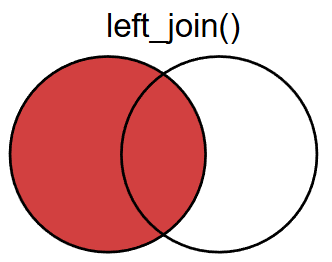

2.  right_join(): Adiciona a una tabla información proveniente de otra tabla. La segunda tabla delimita los valores que se cruzarán para complementar información. En síntesis, right_join() Conserva todas las filas de la tabla de la derecha.


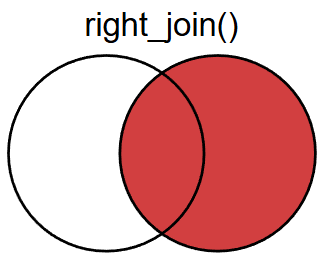

3. inner_join(): Adiciona a una tabla información proveniente de otra tabla. Las dos tabla delimitan los valores que se cruzarán para complementar información. En síntesis, inner_join() Conserva todas las filas para las observaciones (valores) que están simultaneamente en ambas tablas.


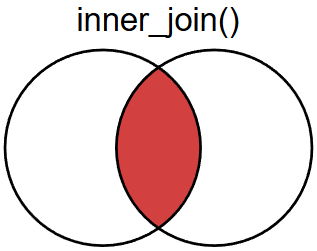

4. full_join(): Adiciona a una tabla información proveniente de otra tabla. En este caso ninguna tabla delimita los valores que se cruzarán, es decir, todas las observaciones se conservarán. En síntesis, inner_join() Conserva todas las filas de todas las observaciones (valores), tanto aquello que coincide, como aquello que no coincide.


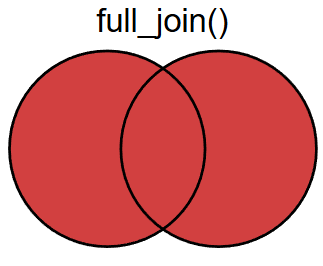

5. anti_join(): Elimina la información que no coincide con otra tabla. Esta función nos regresa los valores diferentes.

También es importante tener presente que existen distintos tipos de relaciones entre los valores de dos conjuntos de datos. Estas relaciones pueden ser:


1.   De uno a uno: Cada valor de la tabla A solamente cruza con un valor de la tabla B
2.   De uno a muchos: Cada valor de la tabla A cruza con múltiples valores de la tabla B.
3. De muchos a muchos: Cada valor de la tabla A cruca con múltiples valores de la tabla B y vada valor de la tabla B cruza con varios valores de la tabla A.


La sintáxis más básica de este conjunto de funciones se puede resumir como sigue:

left_join(
  x,
  y,
  by = "columna_en_comun"
)

donde x es la tabla de la izquierda, y es la tabla de la derecha y "columna_en_comun" debe reemplazarse por el nombre de la variable por la cual se hace el join. Cuando se tienen dos columnas con nombres distintos que se quieren cruzar, la sintaxis es la siguiente:

left_join(
  x,
  y,
  by = c("columna_tabla_de_la_izquierda" = "columna_tabla_de_la_derecha")
)


## Taller cruces de bases de datos

Objetivo: Explorar herramientas y metodologías para integrar múltiples fuentes de datos en R de forma eficiente y reproducible usando el paquete dplyr
Tomar los siguientes conjuntos de datos

A: https://www.datos.gov.co/Educaci-n/Saber-11-2020-2/rnvb-vnyh/about_data

B:https://www.datos.gov.co/Mapas-Nacionales/DIVIPOLA-C-digos-municipios-geolocalizados/vafm-j2df/about_data

Donde A son los resultados de las pruebas del icfes del 2020 y B el listado de códigos divipola de los municipios de Colombia junto con su latitud y longitud.

### Punto 1
Utilizando un tipo de Join de dplyr encuentre las coordenadas para cada uno de los COLEGIOS de la tabla (Municipio donde se encuentra ubicado), use el campo COLE_COD_MCPIO_UBICACION en la Tabla A

Solución:

In [81]:
## importar datos
path_saber <- "input_data/Saber_11__2020-2_20250626.csv"

path_divipola <- "input_data/DIVIPOLA-_C_digos_municipios_geolocalizados_20250626.csv"

saber <- read_csv(path_saber)

munis_divipola <- read_csv(path_divipola)

head(saber)

head(munis_divipola)

Rows: 504872 Columns: 81
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (59): ESTU_TIPODOCUMENTO, ESTU_NACIONALIDAD, ESTU_GENERO, ESTU_FECHANACI...
dbl (22): PERIODO, COLE_COD_DANE_ESTABLECIMIENTO, COLE_COD_DANE_SEDE, PUNT_L...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1121 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): NOM_DPTO, NOM_MPIO, TIPO, Geo Municipio
dbl (4): COD_DPTO, COD_MPIO, LATITUD, LONGITUD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,⋯,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
TI,SUIZA,F,03/03/2003 12:00:00 AM,20204,SB11202040211436,ESTUDIANTE,SUIZA,No,CUNDINAMARCA,⋯,55,81,A1,244,49,54.88236,3,3,PUBLICAR,NO
PEP,VENEZUELA,M,05/10/2002 12:00:00 AM,20204,SB11202040433216,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,⋯,33,6,A-,238,44,49.25231,2,2,PUBLICAR,NO
TI,VENEZUELA,F,12/14/2003 12:00:00 AM,20204,SB11202040244180,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,⋯,59,87,A2,325,94,40.73367,1,3,PUBLICAR,GENERACION E - GRATUIDAD
CE,VENEZUELA,M,04/12/2003 12:00:00 AM,20204,SB11202040210971,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,⋯,47,58,A-,238,45,48.21795,2,3,PUBLICAR,NO
TI,COLOMBIA,F,03/03/2004 12:00:00 AM,20204,SB11202040235382,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,⋯,43,40,A-,202,19,60.91219,3,3,PUBLICAR,NO
TI,COLOMBIA,M,12/14/2002 12:00:00 AM,20204,SB11202040237578,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,⋯,35,12,A-,222,33,43.23996,2,3,PUBLICAR,NO


COD_DPTO,NOM_DPTO,COD_MPIO,NOM_MPIO,TIPO,LATITUD,LONGITUD,Geo Municipio
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
5,ANTIOQUIA,5001,MEDELLÍN,Municipio,6.257590,-75.61103,POINT (-75.61103107 6.257590259)
5,ANTIOQUIA,5002,ABEJORRAL,Municipio,5.803728,-75.43847,POINT (-75.43847353 5.803728154)
5,ANTIOQUIA,5004,ABRIAQUÍ,Municipio,6.627569,-76.08598,POINT (-76.08597756 6.627569378)
5,ANTIOQUIA,5021,ALEJANDRÍA,Municipio,6.365534,-75.09060,POINT (-75.09059702 6.365534125)
5,ANTIOQUIA,5030,AMAGÁ,Municipio,6.032922,-75.70800,POINT (-75.7080031 6.032921994)
5,ANTIOQUIA,5031,AMALFI,Municipio,6.977789,-74.98124,POINT (-74.9812393 6.977788843)


In [82]:
## Cambiar el tipo de valor para pasarlo a numérico. R no permite el cruce entre
## distintos tipos de valores.
saber <- saber %>%
  mutate(COLE_COD_MCPIO_UBICACION = as.numeric(COLE_COD_MCPIO_UBICACION))

## se realiza el join
saber_munis <- saber %>%
  left_join(munis_divipola, by = c("COLE_COD_MCPIO_UBICACION" = "COD_MPIO"))

head(saber_munis)

ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,⋯,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E,COD_DPTO,NOM_DPTO,NOM_MPIO,TIPO,LATITUD,LONGITUD,Geo Municipio
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
TI,SUIZA,F,03/03/2003 12:00:00 AM,20204,SB11202040211436,ESTUDIANTE,SUIZA,No,CUNDINAMARCA,⋯,3,PUBLICAR,NO,25,CUNDINAMARCA,CAJICÁ,Municipio,4.930403,-74.02985,POINT (-74.02985115 4.930402779)
PEP,VENEZUELA,M,05/10/2002 12:00:00 AM,20204,SB11202040433216,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,⋯,2,PUBLICAR,NO,25,CUNDINAMARCA,CHÍA,Municipio,4.857824,-74.03810,POINT (-74.03809539 4.857823671)
TI,VENEZUELA,F,12/14/2003 12:00:00 AM,20204,SB11202040244180,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,⋯,3,PUBLICAR,GENERACION E - GRATUIDAD,25,CUNDINAMARCA,CAJICÁ,Municipio,4.930403,-74.02985,POINT (-74.02985115 4.930402779)
CE,VENEZUELA,M,04/12/2003 12:00:00 AM,20204,SB11202040210971,ESTUDIANTE,VENEZUELA,No,CUNDINAMARCA,⋯,3,PUBLICAR,NO,25,CUNDINAMARCA,CAJICÁ,Municipio,4.930403,-74.02985,POINT (-74.02985115 4.930402779)
TI,COLOMBIA,F,03/03/2004 12:00:00 AM,20204,SB11202040235382,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,⋯,3,PUBLICAR,NO,25,CUNDINAMARCA,CAJICÁ,Municipio,4.930403,-74.02985,POINT (-74.02985115 4.930402779)
TI,COLOMBIA,M,12/14/2002 12:00:00 AM,20204,SB11202040237578,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,⋯,3,PUBLICAR,NO,25,CUNDINAMARCA,CAJICÁ,Municipio,4.930403,-74.02985,POINT (-74.02985115 4.930402779)


### Punto 2
Realice una tabla que cuente la cantidad de estudiantes que presentaron el examen por municipio en la tabla A, incluya el campo COLE_COD_MCPIO_UBICACION.

Solución:


In [83]:
n_estu_munic <- saber %>%
  group_by(COLE_COD_MCPIO_UBICACION) %>%
  summarise(n_estudiantes_muni = n()) %>%
  ungroup()

head(n_estu_munic)

COLE_COD_MCPIO_UBICACION,n_estudiantes_muni
<dbl>,<int>
5001,27909
5002,191
5004,18
5021,40
5030,260
5031,254


### Punto 3
Utilizando un tipo de Join de dplyr presente en la tabla A cuantos estudiantes presentaron el examen por municipio. ¿Hay municipios en donde no se haya presentado el examen?, si es así, indique cuales.

Solución:

In [88]:
munis_sin_pru <- saber %>%
  anti_join(munis_divipola, by = c("COLE_COD_MCPIO_UBICACION" = "COD_MPIO"))

munis_sin_pru_vect <- unique(munis_sin_pru$COLE_COD_MCPIO_UBICACION)

munis_sin_pru_vect

[1] 27086

### Punto 4
¿Existen diferencias en el nombre de los municipios de la tabla A (COLE_MCPIO_UBICACION) respecto a los nombres de los municipios de la tabla B (NOM_MPIO)?

Solución:

In [91]:
munis_names <- saber %>%
  anti_join(munis_divipola, by = c("COLE_MCPIO_UBICACION" = "NOM_MPIO"))

munis_diff_names <- unique(munis_names$COLE_MCPIO_UBICACION)

munis_diff_names

[1] "BOGOTÁ D.C."     "CÚCUTA"          "TOLÚ VIEJO"      "GUAPÍ"          
 [5] "SOTARA"          "CUASPÚD"         "MOMPÓS"          "FUENTEDEORO"    
 [9] "BELÉN DE BAJIRÁ" "ANCUYÁ"          "BARRANCO MINAS"